# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

### Task 1.1

Let $B.\textrm{shape} = (m, n)$. Then $X$ must have $m$ columns.

$k$-th column of $A X B$:
$$(A X B)_{:, k} = A X B_{:, k} = A \sum_{i = 1}^m X_{:, i} b_{ik} = \sum_{i = 1}^m (b_{ik} A \cdot X_{:, i}) = \begin{bmatrix} b_{1k} A & b_{2k} A & \ldots & b_{mk} A \end{bmatrix} \begin{bmatrix} X_{:, 1} \\ X_{:, 2} \\ \vdots \\ X_{:, m} \end{bmatrix} = ((B_{:, k})^\top \otimes A) \mathrm{vec}(X), \,\,\, k = 1, \ldots, n$$

$$\mathrm{vec}(A X B) = \begin{bmatrix} (A X B)_{:, 1} \\ \vdots \\ (A X B)_{:, n} \end{bmatrix} = \begin{bmatrix} (B_{:, 1})^\top \otimes A \\ \vdots \\ (B_{:, n})^\top \otimes A \end{bmatrix} \mathrm{vec}(X) = (B^\top \otimes A) \mathrm{vec}(X)$$

If reshape is rowwise, denote it as $\mathrm{vecr}$. Let $A.\textrm{shape} = (p, q)$. Then $X$ must have $q$ rows.

$k$-th row of $A X B$:

$$(A X B)_{k, :} = A_{k, :} X B = \sum_{i = 1}^q a_{ki} X_{i, :} B = \sum_{i = 1}^q (X_{i, :} \cdot a_{ki} B) = \begin{bmatrix} X_{1, :} & \dots & X_{q, :} \end{bmatrix} \begin{bmatrix} a_{k1} B \\ \vdots \\ a_{kq} B \end{bmatrix} = \mathrm{vecr}(X)^\top ((A_{k, :})^\top \otimes B)$$

$$\mathrm{vecr}(A X B) = \begin{bmatrix} ((A X B)_{1, :})^\top \\ \vdots \\ ((A X B)_{p, :})^\top \end{bmatrix} = \begin{bmatrix} (\mathrm{vecr}(X)^\top ((A_{1, :})^\top \otimes B))^\top \\ \vdots \\ (\mathrm{vecr}(X)^\top ((A_{p, :})^\top \otimes B))^\top \end{bmatrix}$$

Using the transpose property of the Kronecker product (https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations) that $(A \otimes B)^\top = A^\top \otimes B^\top$:

$$\mathrm{vecr}(A X B) = \begin{bmatrix} A_{1, :} \otimes B^\top \\ \vdots \\ A_{p, :} \otimes B^\top \end{bmatrix} \mathrm{vecr}(X) = (A \otimes B^\top) \mathrm{vecr}(X)$$

### Task 1.2

Let $A.\textrm{shape} = (m, n)$ and $B.\textrm{shape} = (p, q)$, then $(A \otimes B).\textrm{shape} = (m p, n q)$. This means $x$ must have $n q$ elements. And the result of $(A \otimes B) x$ has $m p$ elements.

Each entry in the Kronecker product is a product of 2 scalars from $A$ and $B$, so, assuming constant-time entry lookup in $A$ and $B$, the complexity of Kronecker product is $O(m n p q)$. Next, multiplying $(A \otimes B)$ by $x$ takes $O(n q)$ operations for each of $m p$ elements of the result which also gives $O(m n p q)$ complexity. In total, naive computation has $O(m n p q)$ complexity.

The complexity can be reduced using the results of **task 1.1**. Let $X = \mathrm{reshape}(x, (q, n))$. Then, $(A \otimes B) x = \mathrm{vec}(B X A^\top)$. If reshaping is efficient, that is if the memory reallocations do not take place and only the indexing rules change, the $\mathrm{vec}$ operation can be considered to have constant time complexity, $O(1)$. If this is true, we can also not consider the transposition complexity. Then the total complexity of multiplication three matrices with shapes $(p, q)$, $(q, n)$ and $(n, m)$ will be $O(p q n + q n m)$. Now we have more efficient result than the naive approach $O(m n p q)$.

### Task 1.3

Using the mixed-product property and the inverse of a Kronecker product property from https://en.wikipedia.org/wiki/Kronecker_product#Relations_to_other_matrix_operations:

$$A \otimes I + I \otimes B = S_A \Lambda_A S_A^{-1} \otimes S_B S_B^{-1} + S_A S_A^{-1} \otimes S_B \Lambda_B S_B^{-1} = (S_A \Lambda_A \otimes S_B)(S_A^{-1} \otimes S_B^{-1}) + (S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) = (S_A \Lambda_A \otimes S_B + S_A \otimes S_B \Lambda_B)(S_A^{-1} \otimes S_B^{-1}) = ((S_A \otimes S_B)(\Lambda_A \times I) + (S_A \otimes S_B)(I \otimes \Lambda_B))(S_A \otimes S_B)^{-1} = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B)(S_A \otimes S_B)^{-1} = S \Lambda S^{-1}$$

### Task 1.4.1

From lecture 11: with the optimal choice of $\tau$, the $L_2$ norm of error at $k$-th Richardson iteration $\|e_k\|_2 \le q^k \|e_0\|_2 \implies$ relative error is $\frac{\|e_k\|_2}{\|e_0\|_2} \le q^k$

$$\varkappa = \mathrm{cond}(A) = \frac{\lambda_\max}{\lambda_\min} = \frac{1000}{\frac{1}{1000}} = 10^6$$

From lecture 11:

$$q = \frac{\varkappa - 1}{\varkappa + 1} = \frac{999999}{1000001} \approx 1$$

In order to achieve $10^{-4}$ accuracy, $q^k \le 10^{-4} \implies k \le \log_q 10^{-4} = -4 \frac{\lg 10}{\lg q} = -\frac{4}{\lg q} \sim 4.5 \cdot 10^6$ iterations.

We are going to need millions of Richardson iterations to converge.

### Task 1.4.2

From lecture 11, relative error at $(k + 1)$-th Chebyshev iteration is $\frac{\|e_{k + 1}\|_2}{\|e_0\|_2} \le C q^k$

$$q = \frac{\sqrt{\varkappa} - 1}{\sqrt{\varkappa} + 1} \approx 0.9980...$$

$$C q^k \le 10^{-4} \implies k \le -\log_q C - 4 \log_q 10 = -\frac{4 + \lg C}{\lg q} \sim 10^4$$ for $C$ as large as $10^5$, which is better than Richardson iterations.

### Task 1.4.3

From lecture 12: if the matrix has only $m$ different eigenvalues, CG converges in $m$ iterations. In the worst case scenario the algorithm converges in at most 1001 (rank of our matrix) iterations because under the hood it minimizes a quadratic functional.

From https://en.wikipedia.org/wiki/Conjugate_gradient_method#Convergence_theorem, the relative error at $k$-th iteration can be estimated as:

$$\frac{\|e_k\|_A}{\|e_0\|_A} \le 2 q^k$$

$$q = \frac{\sqrt{\varkappa} - 1}{\sqrt{\varkappa} + 1} \approx 0.9980...$$

This corresponds to Chebyshev iteration case with $C = 2$:

$$2 q^k \le 10^{-4} \implies k \le -\frac{4 + \lg 2}{\lg q} \sim 5 \cdot 10^3$$

Number of iterations to converge to $10^{-4}$ is bounded theoretically by $5000$ iterations but in fact it is going to take much less.

### Task 1.5

In [291]:
# Your solution is here
import numpy as np
import scipy as sp
import scipy.sparse

In [292]:
def get_A(n=1000):
    return sp.sparse.diags((*list(np.arange(1, n + 1) / n), n), format='csr')

In [293]:
get_A(10).toarray()

array([[ 0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.7,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , 10. ]])

In [294]:
def richardson(b, tol=1e-4, x=None):
    A = get_A(b.size - 1)
    tau = 2 / (A[0, 0] + A[-1, -1])
    if x is None:
        x = np.ones((A.shape[0], 1))
    e0 = np.linalg.norm(A @ x - b)
    err = e0
    res = [1.]
    
    while err > tol and len(res) <= 1e9:
        r = A @ x - b
        x -= tau * r
        err = np.linalg.norm(r) / e0
        res.append(err)

    if len(res) > 1e9:
        print(f'Max number of iterations reached - {len(res)}')
    return x, res

In [5]:
_, res = richardson(np.ones((1001, 1)))
print(f'Richardson iteration took {len(res)} iterations')

Richardson iteration took 4605090 iterations


In [6]:
import matplotlib.pyplot as plt

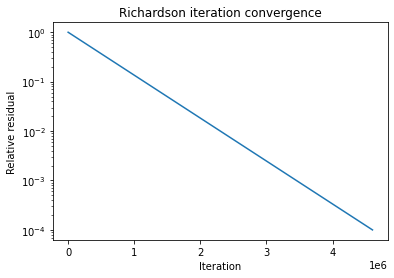

In [7]:
plt.semilogy(res)
plt.xlabel('Iteration')
plt.ylabel('Relative residual')
plt.title('Richardson iteration convergence');

In [8]:
min(res)

9.999981493746652e-05

Richardson iteration has converged to $10^{-4}$ in $4605090$ iterations as we predicted.

In [9]:
def chebyshev(b, niters=4096, x=None):
    A = get_A(b.size - 1)
    roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
    taus = [(A[-1, -1] + A[0, 0] - (A[0, 0] - A[-1, -1]) * r) / 2 for r in roots]
    if x is None:
        x = np.ones((A.shape[0], 1))
    r = A @ x - b
    e0 = np.linalg.norm(r)
    res = [1.]
    
    for i in range(niters):
        x -= 1 / taus[i] * r
        r = A @ x - b
        err = np.linalg.norm(r)
        res.append(err / e0)
        
    return x, res

In [10]:
_, res = chebyshev(np.ones((1001, 1)), niters=2*2*16384)

C:\Users\kuzne\AppData\Local\Temp/ipykernel_20444/2685103172.py:12: RuntimeWarning: overflow encountered in multiply
  x -= 1 / taus[i] * r
C:\Users\kuzne\AppData\Local\Temp/ipykernel_20444/2685103172.py:12: RuntimeWarning: invalid value encountered in subtract
  x -= 1 / taus[i] * r


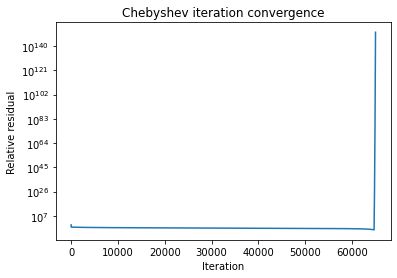

In [11]:
plt.semilogy(res)
plt.xlabel('Iteration')
plt.ylabel('Relative residual')
plt.title('Chebyshev iteration convergence');

In [12]:
min(res)

0.00011866895574707502

Chebyshev iteration has converged to $10^{-4}$ in $6 \cdot 10^5$ iterations as we predicted. The plot of the residual shows that at some point the error starts to grow because we didn't implement permutation of roots for Chebyshev polynomials but it is ok since we only wanted to see how fast we could reach $10^{-4}$ error.

In [295]:
import scipy.sparse.linalg

In [14]:
def cg_callback(_):
    cg_callback.count += 1
    print(f'CG iteration: {cg_callback.count}')
cg_callback.count = 0

sp.sparse.linalg.cg(get_A(n=1000), np.ones((1001, 1)), tol=1e-4, callback=cg_callback);

CG iteration: 1
CG iteration: 2
CG iteration: 3
CG iteration: 4
CG iteration: 5
CG iteration: 6
CG iteration: 7
CG iteration: 8
CG iteration: 9
CG iteration: 10
CG iteration: 11
CG iteration: 12
CG iteration: 13
CG iteration: 14
CG iteration: 15
CG iteration: 16
CG iteration: 17
CG iteration: 18
CG iteration: 19
CG iteration: 20
CG iteration: 21
CG iteration: 22
CG iteration: 23
CG iteration: 24
CG iteration: 25
CG iteration: 26
CG iteration: 27
CG iteration: 28
CG iteration: 29
CG iteration: 30
CG iteration: 31
CG iteration: 32
CG iteration: 33
CG iteration: 34
CG iteration: 35
CG iteration: 36
CG iteration: 37
CG iteration: 38
CG iteration: 39
CG iteration: 40
CG iteration: 41
CG iteration: 42
CG iteration: 43
CG iteration: 44
CG iteration: 45
CG iteration: 46
CG iteration: 47
CG iteration: 48
CG iteration: 49
CG iteration: 50
CG iteration: 51
CG iteration: 52
CG iteration: 53
CG iteration: 54
CG iteration: 55
CG iteration: 56
CG iteration: 57
CG iteration: 58
CG iteration: 59
CG ite

CG converged in 140 iterations - even faster than we expected.

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

(-0.5, 329.5, 329.5, -0.5)

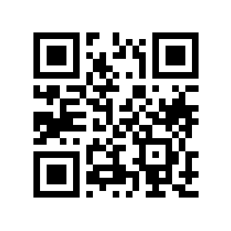

In [220]:
import matplotlib.pyplot as plt
x = plt.imread('qrcode.gif')[:,:,0]
n = x.shape[0]
plt.imshow(x, cmap="gray")
plt.axis("off")

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$T_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}e^{-\alpha[(i_1-j_1)^2 + (i_2-j_2)^2]}, \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [298]:
import scipy.linalg
import scipy.sparse.linalg
import numpy as np

In [299]:
def T_matvec(x, alpha):
    n = round(len(x)**.5)
    
    ind_diff = np.concatenate((range(n), range(-n + 1, 0))).reshape((1, 2 * n - 1))
    t = alpha / np.pi * np.exp(-alpha * (ind_diff**2 + ind_diff.T**2)).T
    
    x = np.reshape(x, (n, n))
    x_ext = np.concatenate((x, np.zeros((n, n - 1))), axis=1)
    x_ext = np.concatenate((x_ext, np.zeros((n - 1, 2 * n - 1))))
    return np.fft.ifft2(np.fft.fft2(t) * np.fft.fft2(x_ext))[:n, :n].real.reshape((n**2,))

alpha = .5
T = scpl.LinearOperator((n**2, n**2), matvec = lambda x : T_matvec(x, alpha))

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [300]:
import scipy.sparse.linalg

In [231]:
def count_iters(_):
    count_iters.count += 1
count_iters.count = 0

In [233]:
alphas = 10**np.arange(-3., 0)[::-1]
tols = 10**np.arange(-7., -2)[::-1]
iters = np.zeros((len(alphas), len(tols)))
errs = np.zeros((len(alphas), len(tols)))

def count_iters(_):
    count_iters.count += 1
count_iters.count = 0

x_vec = x.reshape((n**2,))

for i in range(len(alphas)):
    alpha = alphas[i]
    for j in range(len(tols)):
        tol = tols[j]
        
        T = sp.sparse.linalg.LinearOperator((n**2, n**2), matvec=lambda x:T_matvec(x,alpha))
        y = T @ x_vec
        count_iters.count = 0
        x_deconvolved = sp.sparse.linalg.cg(T, y, tol=tol, callback=count_iters)[0]
        errs[i, j] = np.linalg.norm(x_deconvolved - x_vec) / np.linalg.norm(x_vec)
        iters[i, j] = count_iters.count
        

In [234]:
print(f'tols = {tols}')
print(f'alphas =\n{alphas.reshape((3, 1))}')
print('errs:')
print(errs)

tols = [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
alphas =
[[0.1  ]
 [0.01 ]
 [0.001]]
errs:
[[0.12847145 0.10191431 0.09586764 0.07218324 0.06672478]
 [0.21519193 0.20193916 0.19717952 0.19488263 0.18962599]
 [0.4362718  0.4198482  0.40011396 0.3804841  0.37017793]]


In [235]:
print(f'tols = {tols}')
print(f'alphas =\n{alphas.reshape((3, 1))}')
print('iters:')
print(iters)

tols = [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
alphas =
[[0.1  ]
 [0.01 ]
 [0.001]]
iters:
[[  11.   46.  136.  788. 2419.]
 [  18.   53.  168.  559. 2485.]
 [  13.   49.  158.  509. 1367.]]


1) why does the relative error not converge to zero?

Because operator $T$ is ill-conditioned. In exact arithmetics CG would solve our problem for no more than $n^2$ steps but in reality we are dealing with finite precision which only represents $\sim 16$ digits. So the round-off error of each operation is $\sim 10^{-16}$. For ill-conditioned problems with huge condition number such error can be crucial. The error of numerical solution of a linear system is proportional to the condition number. So, if the condition number is huge, the error can be huge to. For the CG method $T$-orthogonality (where $T$ is our operator) of the generated vectors of Krylov subspace is important. So any error can spoil the orthogonality.

2) why does the relative error converge to different values for different $\alpha$?

Because $\alpha$ defines the matrix $T$ and hence its condition number. For different $\alpha$ there is different threshold of error which can't be eliminated by the CG.

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

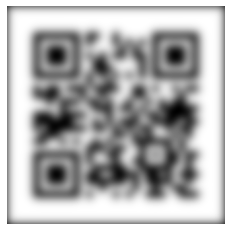

In [302]:
alpha = .01
T = sp.sparse.linalg.LinearOperator((n**2, n**2), matvec=lambda x:T_matvec(x,alpha))
y = T @ x_vec
plt.imshow(y.reshape(n, n), cmap='gray')
plt.axis('off');

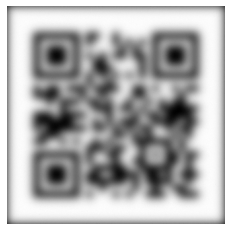

In [303]:
y_hat = y + np.random.normal(loc=0, scale=1, size=y.shape)
plt.imshow(y_hat.reshape(n, n), cmap='gray')
plt.axis('off');

In [254]:
def count_iters(x_cur):
    count_iters.count += 1
    print(f'iter: {count_iters.count}')
    print(f'error: {np.linalg.norm(x_cur - x_vec) / np.linalg.norm(x_vec)}\n\n')
count_iters.count = 0

In [258]:
count_iters.count = 0
x_deconvolved = sp.sparse.linalg.cg(T, y_hat, tol=1e-5, maxiter=300, callback=count_iters)

iter: 1
error: 0.4012462612866346


iter: 2
error: 0.33983272463948216


iter: 3
error: 0.30375812488226844


iter: 4
error: 0.28240821976461106


iter: 5
error: 0.26935475158228095


iter: 6
error: 0.2703451055621805


iter: 7
error: 0.2840887122646801


iter: 8
error: 0.3334914416237303


iter: 9
error: 0.4492578989004588


iter: 10
error: 0.6932209020900771


iter: 11
error: 1.145218937109556


iter: 12
error: 1.8097153625242426


iter: 13
error: 2.824342834392581


iter: 14
error: 4.319403008133811


iter: 15
error: 6.89343395322174


iter: 16
error: 10.223989966090354


iter: 17
error: 14.363717048926233


iter: 18
error: 20.832582292666686


iter: 19
error: 29.577443484735216


iter: 20
error: 40.21397494132521


iter: 21
error: 53.382014252521884


iter: 22
error: 68.78678448906531


iter: 23
error: 91.29031845284389


iter: 24
error: 115.31419602827395


iter: 25
error: 141.89530534411767


iter: 26
error: 173.57288678267798


iter: 27
error: 209.4379090875639


iter: 28
error:

iter: 223
error: 59701.39846140418


iter: 224
error: 60411.602521885456


iter: 225
error: 61031.0687861553


iter: 226
error: 61652.75757859937


iter: 227
error: 62206.55570689277


iter: 228
error: 62795.32413418952


iter: 229
error: 63437.79608918275


iter: 230
error: 64089.71238949475


iter: 231
error: 64676.33000265182


iter: 232
error: 65296.09877474134


iter: 233
error: 65950.26749693906


iter: 234
error: 66760.15358328322


iter: 235
error: 67480.7950651593


iter: 236
error: 68142.85099493465


iter: 237
error: 68766.16279482956


iter: 238
error: 69439.86937803883


iter: 239
error: 70093.49311166511


iter: 240
error: 70810.14527538983


iter: 241
error: 71475.89965393078


iter: 242
error: 72119.5959860027


iter: 243
error: 72690.71387458598


iter: 244
error: 73393.30153642152


iter: 245
error: 74102.30539453427


iter: 246
error: 74813.02720436083


iter: 247
error: 75400.7299492376


iter: 248
error: 76108.62295994737


iter: 249
error: 76908.73556043215


iter

After 10-th iteration the error starts to grow. CG does not converge in our case for noized $\hat{y}$. In **task 2** we already were receiving bad results but the only disturbance there were small numerical errors. In this case there some more significant errors introduced to the problem, like Gaussian noize. So, deconvolution does not converge.

In order to use CG, we have to apply Tikhonov regularization which is a common tool for dealing with ill-conditioned problems. It reduces the condition number but it also affects the solution, so we will no longer be able to obtain the exact solution, we only will get the answer which is **close** to the solution in the sense of some norm.

We also can try to use preconditioners, for example a diagonal preconditioner given that $T$ is diagonally dominant.

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [277]:
def T_lmbda_matvec(x, alpha, lmbda):
    # Using distributivity property of matrix-by-vector multiplication.
    return T_matvec(x, alpha) + lmbda**2 * x

In [278]:
lambdas = 10**np.arange(-1, 2.)[::-1]
tols = 10**np.arange(-7, -2.)[::-1]

def count_iters(_):
    count_iters.count += 1
count_iters.count = 0

for i, lmbda in enumerate(lambdas):
    for j, tol in enumerate(tols):
        Tl = sp.sparse.linalg.LinearOperator((n**2, n**2), matvec = lambda x:T_lmbda_matvec(x, alpha, lmbda))
        y = Tl @ x_vec
        count_iters.count = 0
        x_deconvolved = sp.sparse.linalg.cg(Tl, y, tol=tol, callback=count_iters)[0]
        errs[i, j] = np.linalg.norm(x_deconvolved - x_vec) / np.linalg.norm(x_vec)
        iters[i, j] = count_iters.count
        

In [282]:
print(f'tols = {tols}')
print(f'lambdas =\n{lambdas.reshape((3, 1))}')
print('errs:')
print(errs)

tols = [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
lambdas =
[[10. ]
 [ 1. ]
 [ 0.1]]
errs:
[[6.38329705e-06 6.38329705e-06 6.38329705e-06 1.79674508e-08
  1.79674508e-08]
 [8.69534952e-04 2.62334503e-05 4.16227631e-06 7.45201206e-07
  1.24668992e-07]
 [1.74203456e-02 1.68384643e-03 1.61690822e-04 1.69825727e-05
  1.80017331e-06]]


In [283]:
print(f'tols = {tols}')
print(f'lambdas =\n{lambdas.reshape((3, 1))}')
print('iters:')
print(iters)

tols = [1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]
lambdas =
[[10. ]
 [ 1. ]
 [ 0.1]]
iters:
[[ 2.  2.  2.  3.  3.]
 [ 4.  6.  7.  8.  9.]
 [19. 30. 41. 52. 63.]]


We can clearly see the number of iterations to converge has decreased compared to the **task 2** case. CG converges faster and with less error because adding parameter $\lambda$ to the main diagonal of $T$ improved its condition number and hence the speed of convergence. It was shown (https://en.wikipedia.org/wiki/Tikhonov_regularization) that adding a positive number to the main diagonal of the matrix improves its condition number. And that's exactly what we observe.

We can also see the number of iterations is larger for less value of $\lambda$ because the change to the matrix in that case is not really big.

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

In [288]:
def first_col(x, alpha, lmbda):
    n = round(len(x)**.5)
    ind = np.arange(n).reshape((1, n))
    t = alpha / np.pi * np.exp(-alpha * (ind**2 + ind.T**2)).T
    t[0, 0] += lmbda**2
    return t.reshape((n**2,))

In [306]:
def C_inv_matvec(x, alpha, lmbda):
    c = first_col(x, alpha, lmbda)
    return np.fft.ifft(1 / np.fft.fft(c) * np.fft.fft(x)).real.reshape((n**2,))

In [349]:
lmbda = 1.
alpha = .01
# mv = lambda x: C_inv_matvec(T_lmbda_matvec(x, alpha, lmbda), alpha, lmbda)
mv = lambda x: C_inv_matvec(x, alpha, lmbda)
C = sp.sparse.linalg.LinearOperator((n**2, n**2), matvec=mv)
T = sp.sparse.linalg.LinearOperator((n**2, n**2), matvec=lambda x:T_lmbda_matvec(x,alpha,lmbda))

In [350]:
x_precond = sp.sparse.linalg.cg(C, y_hat, tol=1e-4)[0]

In [352]:
x_lmb = sp.sparse.linalg.cg(T, y_hat, tol=1e-4)[0]

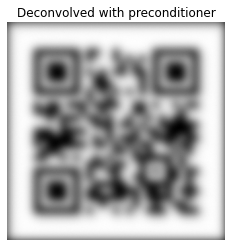

In [353]:
plt.imshow(x_precond.reshape(n, n), cmap='gray')
plt.title('Deconvolved with preconditioner')
plt.axis('off');

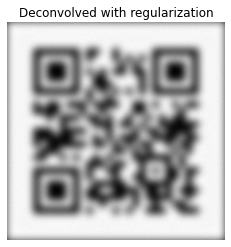

In [354]:
plt.imshow(x_lmb.reshape(n, n), cmap='gray')
plt.title('Deconvolved with regularization')
plt.axis('off');

In [355]:
np.linalg.norm(x_precond - x_vec) / np.linalg.norm(x_vec)

0.44000693925648376

In [356]:
np.linalg.norm(x_lmb - x_vec) / np.linalg.norm(x_vec)

0.6145775973399237

We get better accuracy with preconditioning.

Now let's check time.

In [363]:
%timeit sp.sparse.linalg.cg(C, y_hat, tol=1e-4)

277 ms ± 7.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [364]:
%timeit sp.sparse.linalg.cg(T, y_hat, tol=1e-4)

2.16 s ± 9.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [365]:
print(f'Speedup is {2.14 / .187}')

Speedup is 11.44385026737968


Now let's check iterations.

In [366]:
def count_iters(_):
    count_iters.count += 1
count_iters.count = 0

In [370]:
sp.sparse.linalg.cg(C, y_hat, tol=1e-4, callback=count_iters);

In [371]:
count_iters.count

32

In [372]:
sp.sparse.linalg.cg(T, y_hat, tol=1e-4, callback=count_iters);

In [373]:
count_iters.count

37